In [1]:
import math 
import cmath
import matplotlib.pyplot as plt
import random
import numpy as np
import scipy
from scipy.io import wavfile
import pywt
from scipy.fftpack import fft,ifft,dct,idct

/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
fs,dat = wavfile.read('audio.wav')

n=int(math.log(len(dat))/math.log(2))
num_of_samples=2**n

data=[]

for i in range(num_of_samples):
    data.append(dat[i])

In [3]:
num_of_zeros=[]
for i in range(int(num_of_samples/1000)):
    num_of_zeros.append(i*1000)

In [4]:
cosine_transform=dct(data,norm='ortho')

In [5]:
def compressed_cosine_transform(zero):
    comp_cos_tran=[]
    for i in range(num_of_samples-zero):
        comp_cos_tran.append(cosine_transform[i])        
    
    comp_cos_tran=np.array(comp_cos_tran)
    
    return comp_cos_tran

In [6]:
def inverse_cosine_transform(cos_tran,zero):
    
    cos_tran=list(cos_tran)
    
    for i in range(zero):
        cos_tran.append(0)
    
    cos_tran=np.array(cos_tran)

    
    reverted_seq=idct(cos_tran,norm='ortho')
    
    return reverted_seq

In [7]:
def cosine_transform_error(revert_cos_seq):
    
    revert_cos_seq=np.array(revert_cos_seq)
    
    err_dct=0
    
    for i in range(num_of_samples):
        err_dct=err_dct+((data[i]-revert_cos_seq[i])**2)
    
    err_dct=err_dct/num_of_samples
    return err_dct
        

In [8]:
E_DCT=[]
for zeros in num_of_zeros:    
    compressed_cos_tran=compressed_cosine_transform(zeros)
    
    reverted_cos_seq=inverse_cosine_transform(compressed_cos_tran,zeros)
    
    error=cosine_transform_error(reverted_cos_seq)
    
    E_DCT.append(error)    

In [9]:
hr_transform=pywt.dwt(data,'haar')

In [10]:
def compressed_haar_transform(zero):
    comp_hr_tran=[]
    seq1=list(hr_transform[0])
    seq2=list(hr_transform[1])
    seq=seq1+seq2
    for i in range(num_of_samples-zero) :
        comp_hr_tran.append(seq[i])
    
    comp_hr_tran=np.array(comp_hr_tran)
    
    return comp_hr_tran

In [11]:
def inverse_haar_transform(hr_tran,zero):
    hr_tran=list(hr_tran)
    
    for i in range(zero):
        hr_tran.append(0)
    seq1=[]
    seq2=[]
    for i in range(int(num_of_samples/2)):
        seq1.append(hr_tran[i])
        seq2.append(hr_tran[int(num_of_samples/2)+i])
    
    reverted_seq=pywt.idwt(seq1,seq2,'haar')
    
    return reverted_seq

In [12]:
def haar_transform_error(revert_hr_seq):
    
    revert_hr_seq=np.array(revert_hr_seq)
    
    err_hr=0
    
    for i in range(num_of_samples):
        err_hr=err_hr+((data[i]-revert_hr_seq[i])**2)
    
    err_hr=err_hr/num_of_samples
    return err_hr
        

In [13]:
E_haar=[]
for zeros in num_of_zeros:    
    compressed_hr_tran=compressed_haar_transform(zeros)
    
    reverted_hr_seq=inverse_haar_transform(compressed_hr_tran,zeros)
    
    error=haar_transform_error(reverted_hr_seq)
    
    E_haar.append(error)    

In [14]:
fourier_transform=fft(data)

In [15]:
def compressed_fourier_transform(zero):
    comp_fou_tran=[]
    
    for i in range(int(num_of_samples/2)-int(zero/2) ):
        comp_fou_tran.append(fourier_transform[i])
        
    for i in range(int(num_of_samples/2)+int(zero/2),num_of_samples):
        comp_fou_tran.append(fourier_transform[i])
   
    comp_fou_tran=np.array(comp_fou_tran)
    
    return comp_fou_tran

In [16]:
def inverse_fourier_transform(fou_tran,zero):
    
    fou_tran=list(fou_tran)
    inv_fou=[]
    for i in range(int(num_of_samples/2)-int(zero/2)):
        inv_fou.append(fou_tran[i])
        
    for i in range(zero):
        inv_fou.append(0)
        
    for i in range(int(num_of_samples/2)+int(zero/2),num_of_samples):
        inv_fou.append(fou_tran[i-zero])    
       
    inv_fou=np.array(inv_fou)

    reverted_seq=ifft(inv_fou)
    
    return np.real(reverted_seq)

In [17]:
def fourier_transform_error(revert_fou_seq):
    
    revert_fou_seq=np.array(revert_fou_seq)
    
    err_fou=0
    
    for i in range(num_of_samples):
        err_fou=err_fou+((data[i]-revert_fou_seq[i])**2)
    
    err_fou=err_fou/num_of_samples
    return err_fou
        

In [18]:
E_fou=[]
for zeros in num_of_zeros:    
    compressed_fou_tran=compressed_fourier_transform(zeros)
    
    reverted_fou_seq=inverse_fourier_transform(compressed_fou_tran,zeros)
    
    error=fourier_transform_error(reverted_fou_seq)
    
    E_fou.append(error)    

In [19]:
bit_len=[]
for i in range(len(num_of_zeros)):
    bit_len.append((num_of_samples-i)/num_of_samples)

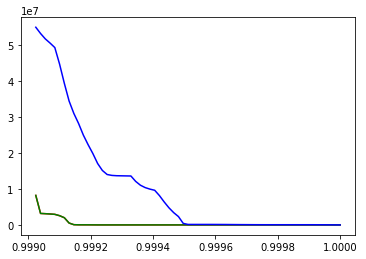

In [20]:
plt.plot(bit_len,E_DCT,'r')
plt.plot(bit_len,E_fou,'g')
plt.plot(bit_len,E_haar,'b')

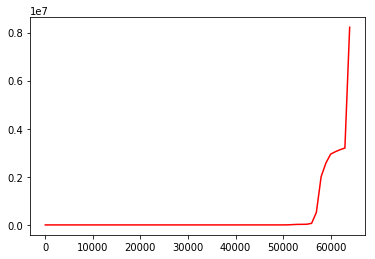

In [21]:
plt.plot(num_of_zeros,E_DCT,'r')

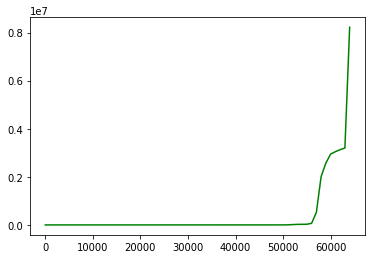

In [22]:
plt.plot(num_of_zeros,E_fou,'g')

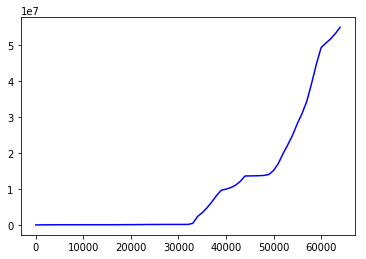

In [23]:
plt.plot(num_of_zeros,E_haar,'b')